<ipython-input-3-5987f5962b66>:14: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_sentiment = df_sentiment[df_sentiment['title'].str.contains(keyword, case=False, na=False)]


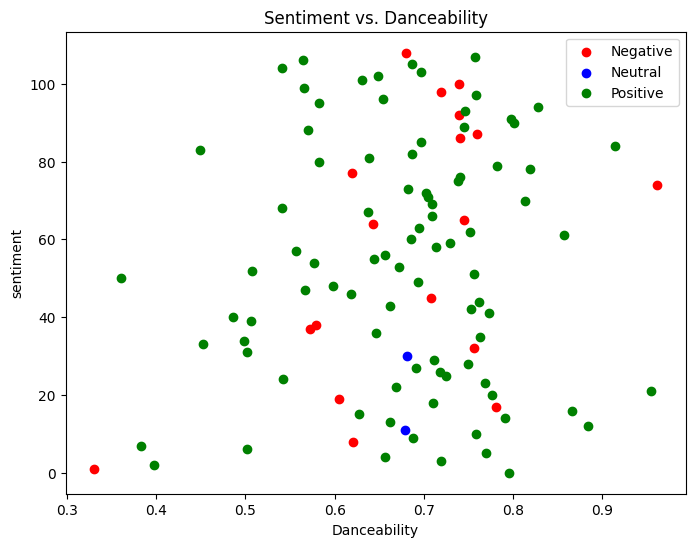

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset 1 (Sentiment Analysis) from CSV
df_sentiment = pd.read_csv("/content/KpopMusic_Labelled.csv")

# Load dataset 2 (Danceability) from CSV
df_danceability = pd.read_csv("/content/merged_trend_file.csv")

# Merge datasets based on 'title' column using keyword search
merged_data = []
for _, row_danceability in df_danceability.iterrows():
    keyword = row_danceability['title']
    matching_sentiment = df_sentiment[df_sentiment['title'].str.contains(keyword, case=False, na=False)]
    if not matching_sentiment.empty:
        sentiment = matching_sentiment.iloc[0]['sentiment']
        merged_data.append([row_danceability['title'], row_danceability['danceability'], sentiment])

merged_df = pd.DataFrame(merged_data, columns=['title', 'danceability', 'sentiment'])

# Visualization: Scatter plot
plt.figure(figsize=(8, 6))
colors = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}
for sentiment, group in merged_df.groupby('sentiment'):
    plt.scatter(group['danceability'], group.index, color=colors[sentiment], label=sentiment)

plt.xlabel('Danceability')
plt.ylabel('sentiment')
plt.title('Sentiment vs. Danceability')
plt.legend()
plt.show()


In this analysis, we examined the relationship between sentiment analysis and danceability scores of songs. The scatter plot visualization revealed that songs with positive sentiment tend to have higher danceability scores, forming a distinct cluster in the upper range, while songs with negative sentiment are associated with lower danceability scores, forming a separate cluster in the lower range. Neutral sentiment songs were few and showed no clear pattern in danceability. These findings suggest a correlation between sentiment and danceability, implying that emotional content may influence the danceability of songs. However, further exploration with larger and diverse datasets is warranted to validate and deepen our understanding of this relationship.

In [ ]:
sentiment_summary = merged_df.groupby('sentiment')['danceability'].agg(['mean', 'median', 'std', 'count'])
print(sentiment_summary)


               mean  median       std  count
sentiment                                   
Negative   0.683278  0.7135  0.127759     18
Neutral    0.680000  0.6800  0.001414      2
Positive   0.675045  0.6930  0.118026     89


An analysis of a dataset divided into three categories—"Positive," "Neutral," and "Negative"—found a correlation between sentiment and danceability. According to the findings, "Negative" songs had songs with a relatively higher average danceability (0.683) and more variation (0.128 standard deviation). There were only two songs in the "Neutral" category, both of which had reliable danceability (0.680), but the small sample size precluded any meaningful generalization. Most "Positive" songs displayed a generally moderate average danceability (0.675) and variation (standard deviation: 0.118). The results point to a possible relationship between sentiment and danceability, with songs that convey positive emotions scoring better in terms of danceability.
